In [1]:
!pip install sklearn

  Using cached sklearn-0.0.post5.tar.gz (3.7 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2951 sha256=9bd73dbd95517dcd2ac8e9af65ecfe0a2faf8142951655755ddc2c7dbc513985
  Stored in directory: /Users/herminiapadialromera/Library/Caches/pip/wheels/97/46/dc/b9e55306f891561765b636c6d8d2721588de39739619e777d3
Successfully built sklearn


In [43]:
#librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

from sklearn import datasets, ensemble
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler


In [44]:
dataset = pd.read_csv('./iris-data.csv')
dataset
#/Users/herminiapadialromera/ironhackb/dataptmad0223_labs/module-3/data-cleaning-challenge/iris-data.csv

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [46]:
#VALUE_COUNTS
print('count_sepal_length:', dataset['sepal_length_cm'].value_counts())
                                   
print('count_petal_length:', dataset['petal_length_cm'].value_counts())
                                    
print('count_petal_width:', dataset['petal_width_cm'].value_counts())

print('CLASS:', dataset['class'].value_counts())

count_sepal_length: sepal_length_cm
5.000    10
5.100     9
6.300     9
5.700     8
5.600     7
6.400     7
5.800     7
6.700     7
6.100     6
4.900     6
5.400     6
4.800     5
6.500     5
5.500     5
6.000     5
4.600     4
6.900     4
6.200     4
5.200     4
4.400     3
6.800     3
5.900     3
7.700     3
7.200     3
0.055     2
6.600     2
4.700     2
7.000     1
0.067     1
0.060     1
0.057     1
5.300     1
7.100     1
7.600     1
7.300     1
4.500     1
7.400     1
7.900     1
Name: count, dtype: int64
count_petal_length: petal_length_cm
1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7     1
3.8     1
6.6     1
6.3     1
1.0     1
6.9     1
3.6     1
6.4     1
Name: count, dty

In [47]:
#MEAN
print('MEDIA:')
mean_sepal_length = dataset['sepal_length_cm'].mean()
print('Mean_sepal_length:', mean_sepal_length)

mean_sepal_width = dataset['sepal_width_cm'].mean()
print('Mean_sepal_width:', mean_sepal_width)

mean_petal_length = dataset['petal_length_cm'].mean()
print('Mean_petal_length:', mean_petal_length)

mean_petal_width = dataset['petal_width_cm'].mean()
print('Mean_petal_width:', mean_petal_width)


MEDIA:
Mean_sepal_length: 5.6446266666666665
Mean_sepal_width: 3.054666666666667
Mean_petal_length: 3.758666666666666
Mean_petal_width: 1.2365517241379314


In [48]:
#MÁXIMOS
print('MÁXIMOS:')
max_sepal_length = dataset['sepal_length_cm'].max()
print('max_sepal_length:', max_sepal_length)

max_sepal_width = dataset['sepal_width_cm'].max()
print('max_sepal_width:', max_sepal_width)

max_petal_length = dataset['petal_length_cm'].max()
print('max_petal_length:', max_petal_length)

max_petal_width = dataset['petal_width_cm'].max()
print('max_petal_width:', max_petal_width)


MÁXIMOS:
max_sepal_length: 7.9
max_sepal_width: 4.4
max_petal_length: 6.9
max_petal_width: 2.5


In [49]:
#MÍNIMOS
print('MÍNIMOS:')
min_sepal_length = dataset['sepal_length_cm'].min()
print('min_sepal_length:', min_sepal_length)

min_sepal_width = dataset['sepal_width_cm'].min()
print('min_sepal_width:', min_sepal_width)

min_petal_length = dataset['petal_length_cm'].min()
print('min_petal_length:', min_petal_length)

min_petal_width = dataset['petal_width_cm'].min()
print('min_petal_width:', min_petal_width)


MÍNIMOS:
min_sepal_length: 0.055
min_sepal_width: 2.0
min_petal_length: 1.0
min_petal_width: 0.1


In [50]:
# Range columns
print('RANGO:')
sepal_length_range = dataset['sepal_length_cm'].max() - dataset['sepal_length_cm'].min()
sepal_width_range = dataset['sepal_width_cm'].max() - dataset['sepal_width_cm'].min()
petal_length_range = dataset['petal_length_cm'].max() - dataset['petal_length_cm'].min()
petal_width_range = dataset['petal_width_cm'].max() - dataset['petal_width_cm'].min()


print('sepal_length_range', sepal_length_range , '\nsepal_width_range:', sepal_width_range)
print('petal_length_range', petal_length_range , '\npetal_width_range:', petal_width_range)


RANGO:
sepal_length_range 7.845000000000001 
sepal_width_range: 2.4000000000000004
petal_length_range 5.9 
petal_width_range: 2.4


In [51]:
# Standard deviation
print('DESVIACIÓN ESTÁNDAR:')
std_sepal_length = dataset['sepal_length_cm'].std()
print('Standard deviation:', std_sepal_length)

std_sepal_width = dataset['sepal_width_cm'].std()
print('Standard deviation:', std_sepal_width)

std_petal_length = dataset['petal_length_cm'].std()
print('Standard deviation:', std_petal_length)

std_petal_width = dataset['petal_width_cm'].std()
print('Standard deviation:', std_petal_width)


DESVIACIÓN ESTÁNDAR:
Standard deviation: 1.3127814037566259
Standard deviation: 0.43312299145516314
Standard deviation: 1.7644204199522626
Standard deviation: 0.7550582936568033


In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [53]:
#Con esta función me habría ahorrado todo lo anterior
dataset.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [54]:
#ELIMINO LOS NULOS
dataset = dataset.drop(dataset[dataset['petal_width_cm'].isnull()].index)
dataset

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [55]:
dataset['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [56]:
#Hago replace para unir los valores-clase iguales.
dataset['class'] = dataset['class'].replace('Iris-setossa', 'Iris-setosa')
dataset['class'] = dataset['class'].replace('versicolor', 'Iris-versicolor')


In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  145 non-null    float64
 1   sepal_width_cm   145 non-null    float64
 2   petal_length_cm  145 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [58]:
# categorical features

cols = ['class']

cat_list = []
for col in cols:
    cat = dataset[col].unique()
    cat_num = len(cat)
    cat_dict = {"categorical_variable":col,
                "number_of_possible_values":cat_num,
                "values":cat}
    cat_list.append(cat_dict)
    
categories = pd.DataFrame(cat_list)
categories

,categorical_variable,number_of_possible_values,values
0,class,3,"[Iris-setosa, Iris-versicolor, Iris-virginica]"


In [59]:
dataset.isnull().sum()


sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

In [60]:
dataset['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [61]:
#ENCONDING
#no utilizo el one-hot-encoding porque creo que así es más visible.
encoding = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
def ordinal_encoding(x):
    for key in encoding:
        if x == key:
            return encoding[key]
dataset['class_enc'] = dataset['class'].apply(ordinal_encoding)
dataset

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,class_enc
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,2.3,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [77]:
#creo una columna con el enconding
dataset['class_enc'] = dataset['class'].apply(ordinal_encoding)
dataset

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,class_enc
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,2.3,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


<Axes: title={'center': 'class_enc'}, xlabel='class'>

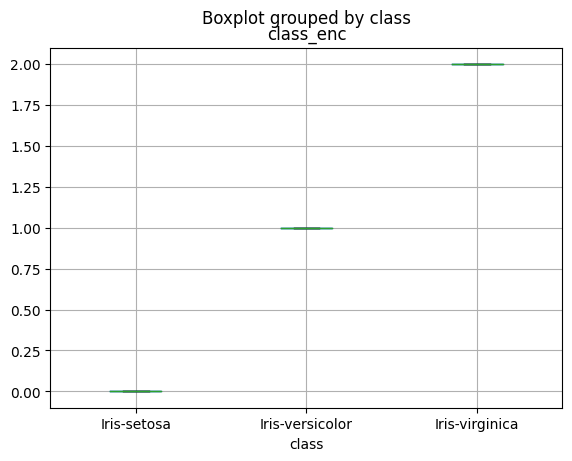

In [84]:
data_count.boxplot(column='class_enc', 
                  by='c', 
                  ax=None, 
                  fontsize=None, 
                  rot=0, 
                  grid=True, 
                  figsize=None, 
                  layout=None, 
                  return_type=None, 
                  backend=None) 

In [70]:
# Sample data

scal = dataset[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm','petal_width_cm','class_enc']]
scal.describe()
#sample_data = sample_data.to_numpy()
#sample_data

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class_enc
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,5.670303,3.046207,3.836552,1.236552,1.034483
std,1.326540,0.435096,1.742955,0.755058,0.811495
min,0.055000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.400000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [71]:
#SCALING- Using scikit-learn .StandardScaler() - ZSCORE

scaler = StandardScaler()
scaled_data = scaler.fit_transform(scal)
scaled_data

array([[-0.43140828,  1.04658781, -1.40278887, -1.37756865, -1.2792043 ],
       [-0.58269907, -0.10656745, -1.40278887, -1.37756865, -1.2792043 ],
       [-0.73398986,  0.35469465, -1.46036158, -1.37756865, -1.2792043 ],
       [-0.80963525,  0.1240636 , -1.34521616, -1.37756865, -1.2792043 ],
       [-0.50705368,  1.27721886, -1.40278887, -1.37756865, -1.2792043 ],
       [-0.20447211,  1.96911201, -1.23007074, -1.11177031, -1.2792043 ],
       [-0.80963525,  0.81595675, -1.40278887, -1.24466948, -1.2792043 ],
       [-0.65834446, -0.10656745, -1.40278887, -1.51046782, -1.2792043 ],
       [ 0.02246407, -0.10656745, -1.575507  , -1.51046782, -1.2792043 ],
       [ 0.09810947,  2.19974306, -1.51793429, -1.37756865, -1.2792043 ],
       [ 0.02246407,  3.12226727, -1.34521616, -1.11177031, -1.2792043 ],
       [-0.20447211,  1.96911201, -1.46036158, -1.11177031, -1.2792043 ],
       [-0.43140828,  1.04658781, -1.40278887, -1.24466948, -1.2792043 ],
       [ 0.02246407,  1.73848096, -1.2

In [72]:

scal_df = pd.DataFrame(scal, columns=['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm','petal_width_cm','class_enc'])
scal_df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class_enc
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,5.670303,3.046207,3.836552,1.236552,1.034483
std,1.326540,0.435096,1.742955,0.755058,0.811495
min,0.055000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.400000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
#No sé si esto es lo que había que hacer o había que añadir algo más. 
#He intentado hacer algún gráfico pero no he sabido. 